In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [1]:
from sklearn.utils import shuffle
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
from sklearn.utils import shuffle
import numpy as np
from numpy import genfromtxt
X=np.zeros((847,1,8000))
Y=np.zeros((847,2))


for i in range(847):
  my_data = genfromtxt("C:/Users/dianu/Downloads/SM/SM_Gen/SM"+str(i+1)+".csv", delimiter=',')
  my_data2 = genfromtxt("C:/Users/dianu/Downloads/SMy/SM_id_Gen/SMy"+str(i+1)+".csv", delimiter=',')
  X[i,0,:]=my_data
  Y[i,:]=my_data2

In [5]:
X, Y = shuffle(X, Y)

In [6]:
# Split the dataset
split_train = int(len(X)*0.7)
split_valid = int(len(X)*0.9)

# Train

X_train = X[:split_train, [0],:]; y_train=Y[:split_train, :]

# Valid

X_valid = X[split_train:split_valid, [0],:]; y_valid=Y[split_train:split_valid,:]

# Test

X_test = X[split_valid:, [0],:]; y_test=Y[split_valid:,:]

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(592, 1, 8000) (592, 2)
(170, 1, 8000) (170, 2)
(85, 1, 8000) (85, 2)


In [2]:
# Simple GRU
import tensorflow as tf
from tensorflow import keras

model = Sequential()
model.add(GRU(128, input_shape=(1,8000)))
model.add(Dense(2))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               3121920   
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 3,122,178
Trainable params: 3,122,178
Non-trainable params: 0
_________________________________________________________________


In [7]:
optimizer = keras.optimizers.Adam(learning_rate=0.003)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['acc'])

history=model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2,validation_data=(X_valid, y_valid))

Epoch 1/100
592/592 - 21s - loss: 1.5225 - acc: 0.8277 - val_loss: 0.9397 - val_acc: 0.7235
Epoch 2/100
592/592 - 3s - loss: 0.6347 - acc: 0.8699 - val_loss: 0.6061 - val_acc: 0.8235
Epoch 3/100
592/592 - 3s - loss: 0.5534 - acc: 0.8818 - val_loss: 0.5601 - val_acc: 0.8353
Epoch 4/100
592/592 - 3s - loss: 0.4803 - acc: 0.9020 - val_loss: 0.5734 - val_acc: 0.8412
Epoch 5/100
592/592 - 3s - loss: 0.4789 - acc: 0.8970 - val_loss: 0.6455 - val_acc: 0.8647
Epoch 6/100
592/592 - 3s - loss: 0.4291 - acc: 0.9223 - val_loss: 0.6218 - val_acc: 0.8059
Epoch 7/100
592/592 - 3s - loss: 0.4136 - acc: 0.9189 - val_loss: 0.6440 - val_acc: 0.8235
Epoch 8/100
592/592 - 3s - loss: 0.4172 - acc: 0.9037 - val_loss: 0.5721 - val_acc: 0.8588
Epoch 9/100
592/592 - 3s - loss: 0.4272 - acc: 0.9088 - val_loss: 0.5965 - val_acc: 0.8647
Epoch 10/100
592/592 - 3s - loss: 0.3996 - acc: 0.9139 - val_loss: 0.5817 - val_acc: 0.8647
Epoch 11/100
592/592 - 3s - loss: 0.3708 - acc: 0.9071 - val_loss: 0.6511 - val_acc: 0.8

592/592 - 3s - loss: 0.1344 - acc: 0.9409 - val_loss: 0.2981 - val_acc: 0.8824
Epoch 91/100
592/592 - 3s - loss: 0.1345 - acc: 0.9476 - val_loss: 0.3264 - val_acc: 0.8824
Epoch 92/100
592/592 - 3s - loss: 0.1261 - acc: 0.9527 - val_loss: 0.2980 - val_acc: 0.8647
Epoch 93/100
592/592 - 3s - loss: 0.1355 - acc: 0.9392 - val_loss: 0.3224 - val_acc: 0.8647
Epoch 94/100
592/592 - 3s - loss: 0.1503 - acc: 0.9358 - val_loss: 0.3187 - val_acc: 0.8529
Epoch 95/100
592/592 - 3s - loss: 0.1416 - acc: 0.9375 - val_loss: 0.3129 - val_acc: 0.8647
Epoch 96/100
592/592 - 3s - loss: 0.1359 - acc: 0.9324 - val_loss: 0.3069 - val_acc: 0.8824
Epoch 97/100
592/592 - 3s - loss: 0.1340 - acc: 0.9426 - val_loss: 0.2788 - val_acc: 0.8941
Epoch 98/100
592/592 - 3s - loss: 0.1384 - acc: 0.9527 - val_loss: 0.3228 - val_acc: 0.8588
Epoch 99/100
592/592 - 3s - loss: 0.1497 - acc: 0.9510 - val_loss: 0.3312 - val_acc: 0.8529
Epoch 100/100
592/592 - 3s - loss: 0.1577 - acc: 0.9493 - val_loss: 0.3501 - val_acc: 0.8941


Text(0.5, 1.0, 'Training and validation loss')

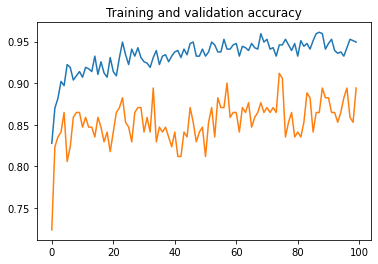

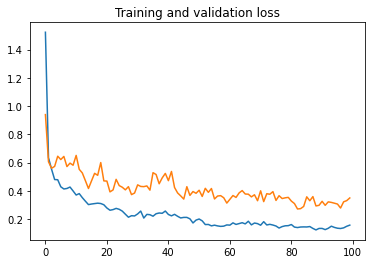

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [9]:
y_predictim=model.predict(X_test)

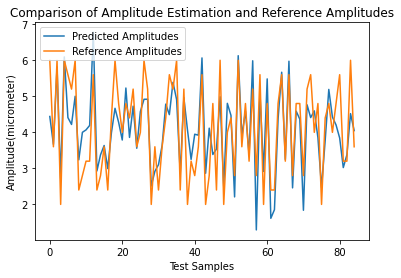

In [10]:
plt.plot(y_predictim[:,0],label="Predicted Amplitudes")
plt.plot(y_test[:,0],label="Reference Amplitudes")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(micrometer)')
plt.title('Comparison of Amplitude Estimation and Reference Amplitudes')
plt.show()

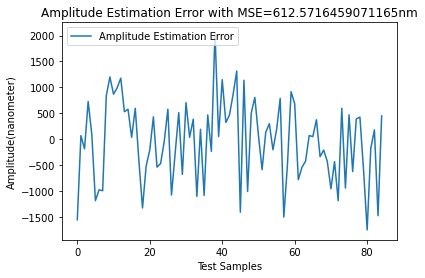

In [11]:
from sklearn.metrics import mean_squared_error
plt.plot(1000*(y_predictim[:,0]-y_test[:,0]),label="Amplitude Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Amplitude(nanometer)')
plt.title('Amplitude Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,0], y_test[:,0]))+'nm')
plt.show()

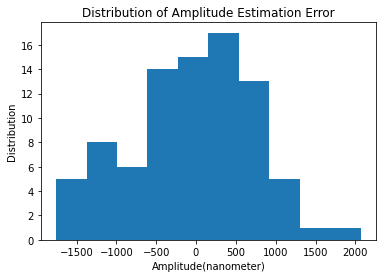

In [12]:
plt.hist(1000*(y_predictim[:,0]-y_test[:,0]), bins = 10)
plt.xlabel('Amplitude(nanometer)')
plt.ylabel('Distribution')
plt.title('Distribution of Amplitude Estimation Error')
plt.show()

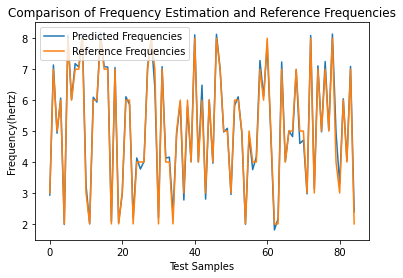

In [13]:
plt.plot(y_predictim[:,1],label="Predicted Frequencies")
plt.plot(y_test[:,1],label="Reference Frequencies")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(hertz)')
plt.title('Comparison of Frequency Estimation and Reference Frequencies')
plt.show()

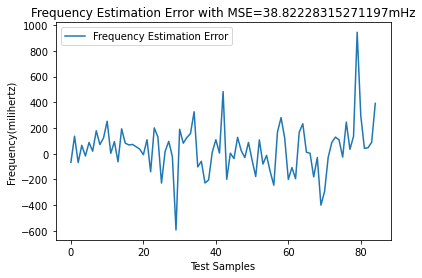

In [14]:
plt.plot(1000*(y_predictim[:,1]-y_test[:,1]),label="Frequency Estimation Error")
plt.legend(loc="upper left")
plt.xlabel('Test Samples')
plt.ylabel('Frequency(milihertz)')
plt.title('Frequency Estimation Error with MSE='+str(1000*mean_squared_error(y_predictim[:,1], y_test[:,1]))+'mHz')
plt.show()

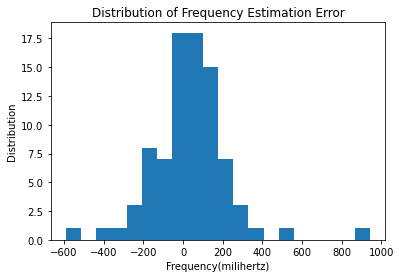

In [15]:
plt.hist(1000*(y_predictim[:,1]-y_test[:,1]), bins = 20)
plt.xlabel('Frequency(milihertz)')
plt.ylabel('Distribution')
plt.title('Distribution of Frequency Estimation Error')
plt.show()